# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

635

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
#units = 'imperial'
#query_url = f"{base_url}appid={weather_api_key}&q={city}&units={units}&q="
#query_url

In [5]:
#create empty lists
city_names = []
max_temps = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
latitude = []
longitude = []

In [6]:
#create counter and import time
import time
start_time = time.time()

record_count = 1
set_count = 1

In [7]:
print("Beginning Data Retrieval")
print("-------------------------------------")

#create iterative loop
for city in cities:
    # Build partial query URL
    query_url = base_url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"
#     units = "imperial"
#     query_url = f"{base_url}appid={weather_api_key}&q={city}&units={units}&q="
    response = requests.get(query_url)
    data = response.json()
    
    #begin exception handling when appending data to all empty lists
    try: 
        city_names.append(data['name'])
        max_temps.append(data['main']['temp_max'])
        humidity.append(data['main']['humidity'])
        cloudiness.append(data['clouds']['all'])
        wind_speed.append(data['wind']['speed'])
        country.append(data['sys']['country'])
        date.append(data['dt'])
        latitude.append(data['coord']['lat'])
        longitude.append(data['coord']['lon'])
        
        print(f'Processing Record {record_count} of Set {set_count} | {city}')
        record_count = record_count + 1
        
        #for the set 1 until record reaches 50, append the data  
        if (record_count > 50) & (set_count == 1):
            record_count = 0
            set_count = set_count + 1
#             end_time = time.time()
#             time.sleep(60-(end_time-start_time))
#             start_time = time.time()
            
        #for all other sets after 1, until record reaches 49, append the data
        elif (set_count > 1) & (record_count > 49):
            record_count = 0
            set_count = set_count + 1
#             end_time = time.time()
#             time.sleep(60-(end_time-start_time))
#             start_time = time.time()
        
        #for 
    except: 
        print("City is not found. Skipping...")
            
print("-------------------------------------")  
print("Data Retrieval is Complete")


Beginning Data Retrieval
-------------------------------------
Processing Record 1 of Set 1 | karratha
Processing Record 2 of Set 1 | san cristobal
Processing Record 3 of Set 1 | mantua
City is not found. Skipping...
Processing Record 4 of Set 1 | maroantsetra
Processing Record 5 of Set 1 | sinop
Processing Record 6 of Set 1 | boa vista
Processing Record 7 of Set 1 | hermanus
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | mataura
Processing Record 12 of Set 1 | kaukauna
Processing Record 13 of Set 1 | sao francisco do conde
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | nouadhibou
Processing Record 16 of Set 1 | saint-philippe
Processing Record 17 of Set 1 | boralday
Processing Record 18 of Set 1 | severo-kurilsk
Processing Record 19 of Set 1 | kuna
Processing Record 20 of Set 1 | san patricio
Processing Record 21 of Set 1 | nikolskoye
Processing Record 22 of Se

Processing Record 38 of Set 4 | felipe carrillo puerto
Processing Record 39 of Set 4 | souillac
Processing Record 40 of Set 4 | halifax
Processing Record 41 of Set 4 | vostok
Processing Record 42 of Set 4 | geraldton
City is not found. Skipping...
Processing Record 43 of Set 4 | jieshou
Processing Record 44 of Set 4 | constitucion
Processing Record 45 of Set 4 | codrington
Processing Record 46 of Set 4 | nioro
Processing Record 47 of Set 4 | barrow
Processing Record 48 of Set 4 | diffa
Processing Record 49 of Set 4 | cidreira
Processing Record 0 of Set 5 | talnakh
Processing Record 1 of Set 5 | portree
Processing Record 2 of Set 5 | klichka
Processing Record 3 of Set 5 | awbari
Processing Record 4 of Set 5 | altamira
Processing Record 5 of Set 5 | dalmau
Processing Record 6 of Set 5 | ankara
Processing Record 7 of Set 5 | tazovskiy
Processing Record 8 of Set 5 | dolores
Processing Record 9 of Set 5 | pringsewu
Processing Record 10 of Set 5 | walvis bay
Processing Record 11 of Set 5 | a

Processing Record 22 of Set 8 | ust-nera
Processing Record 23 of Set 8 | aktash
Processing Record 24 of Set 8 | samarai
Processing Record 25 of Set 8 | yakeshi
City is not found. Skipping...
Processing Record 26 of Set 8 | richards bay
Processing Record 27 of Set 8 | denpasar
Processing Record 28 of Set 8 | flinders
Processing Record 29 of Set 8 | dhuburi
Processing Record 30 of Set 8 | murray
Processing Record 31 of Set 8 | abalak
Processing Record 32 of Set 8 | torres
Processing Record 33 of Set 8 | pitimbu
Processing Record 34 of Set 8 | champerico
Processing Record 35 of Set 8 | pevek
Processing Record 36 of Set 8 | conde
Processing Record 37 of Set 8 | calabozo
Processing Record 38 of Set 8 | zarnovica
Processing Record 39 of Set 8 | coolum beach
Processing Record 40 of Set 8 | sao luiz gonzaga
Processing Record 41 of Set 8 | beringovskiy
Processing Record 42 of Set 8 | pisco
Processing Record 43 of Set 8 | kothi
Processing Record 44 of Set 8 | tambura
Processing Record 45 of Set 

Processing Record 13 of Set 12 | rosario
Processing Record 14 of Set 12 | hukuntsi
Processing Record 15 of Set 12 | beira
Processing Record 16 of Set 12 | altay
Processing Record 17 of Set 12 | shumskiy
Processing Record 18 of Set 12 | berlevag
Processing Record 19 of Set 12 | san fernando
Processing Record 20 of Set 12 | itarema
Processing Record 21 of Set 12 | punta cardon
Processing Record 22 of Set 12 | talara
Processing Record 23 of Set 12 | buin
Processing Record 24 of Set 12 | torrington
Processing Record 25 of Set 12 | srivardhan
Processing Record 26 of Set 12 | mayor pablo lagerenza
Processing Record 27 of Set 12 | manzanares
Processing Record 28 of Set 12 | byron bay
Processing Record 29 of Set 12 | tombouctou
Processing Record 30 of Set 12 | tres lagoas
Processing Record 31 of Set 12 | comodoro rivadavia
Processing Record 32 of Set 12 | mutsu
Processing Record 33 of Set 12 | namibe
Processing Record 34 of Set 12 | mogzon
City is not found. Skipping...
Processing Record 35 of

In [ ]:
#starting output given as an example (ignore this)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
city_data = pd.DataFrame({"City": city_names, "Max Temp":max_temps, "Humidity":humidity, "Cloudiness":cloudiness, "Wind Speed":wind_speed, "Country":country,"Date":date, "Lat":latitude, "Lng":longitude})

city_data.to_csv("output_data/weather_per_city.csv")
city_data

,City,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Lat,Lng
0,Karratha,101.84,28,47,22.95,AU,1638768846,-20.7377,116.8463
1,San Cristobal,71.78,80,100,2.04,VE,1638768746,7.7669,-72.2250
2,Province of Mantua,40.44,91,91,3.00,IT,1638768846,45.1667,10.7833
3,Maroantsetra,80.24,74,68,5.17,MG,1638768847,-15.4333,49.7333
4,Sinop Province,41.43,70,17,12.12,TR,1638768847,41.7711,34.8709
...,...,...,...,...,...,...,...,...,...
585,Pihuamo,66.78,80,100,2.98,MX,1638769101,19.2499,-103.3828
586,Gīdolē,64.65,41,9,4.81,ET,1638769101,5.6500,37.3667
587,Krishnapur,75.02,94,90,11.50,IN,1638769102,22.6703,88.2694
588,Rafaela,70.05,88,2,6.64,AR,1638769102,-31.2503,-61.4867


In [9]:
#checking
n = len(pd.unique(city_data['City']))
n

590

In [ ]:
#starting output given as an example (ignore this)

In [10]:
#get stats of weather per city data
stats_city_data = city_data.describe()
stats_city_data

,Max Temp,Humidity,Cloudiness,Wind Speed,Date,Lat,Lng
count,590.000000,590.00000,590.000000,590.000000,5.900000e+02,590.000000,590.000000
mean,52.710068,74.00339,58.372881,8.219915,1.638769e+09,19.712675,14.239914
std,29.465698,19.94168,38.663626,6.195267,1.044400e+02,33.335177,90.899537
min,-45.290000,9.00000,0.000000,0.000000,1.638768e+09,-54.800000,-179.166700
25%,35.087500,65.00000,20.000000,3.452500,1.638769e+09,-9.144100,-68.100000
50%,61.180000,78.00000,73.500000,6.790000,1.638769e+09,23.100000,17.940600
75%,75.972500,89.00000,96.750000,11.500000,1.638769e+09,48.729675,94.810075
max,102.250000,100.00000,100.000000,38.010000,1.638769e+09,78.218600,179.316700


In [ ]:
#starting output given as an example (ignore this)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
#check if there are any cities with humidity over 100%- there are none
max_humidity_cities = city_data["Humidity"].describe()
max_humidity_cities

count    590.00000
mean      74.00339
std       19.94168
min        9.00000
25%       65.00000
50%       78.00000
75%       89.00000
max      100.00000
Name: Humidity, dtype: float64

In [ ]:
#starting output given as an example (ignore this)

In [ ]:
#given as an example (ignore this)
#  Get the indices of cities that have humidity over 100%.

In [ ]:
#starting output given as an example (ignore this)
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [12]:
#Create x and y axis values: x is latitudes, y is temps
latitudes = city_data["Lat"]
temps = city_data["Max Temp"]

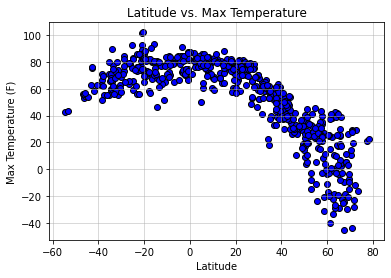

In [13]:
#plot
plt.scatter(x=latitudes, y=temps, edgecolor="black", color="blue")
plt.title("Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(alpha=0.6)
plt.savefig("output_data/Figures/Lat_vs_Temp.png")
plt.show()

# Lat vs temps Plot Analysis: 
This plot is analyzing if there is a trend in latitude and max temps to see if location of a city affects max temps

In [ ]:
# starting output given as an example (ignore this)

## Latitude vs. Humidity Plot

In [14]:
#Create x and y axis values: x is latitudes, y is humidity%
latitudes = city_data["Lat"]
humidity_percentage = city_data["Humidity"]

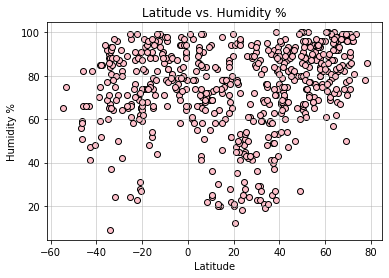

In [15]:
plt.scatter(x=latitudes, y=humidity_percentage, edgecolor="black", color="pink")
plt.title("Latitude vs. Humidity %")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.grid(alpha=0.6)
plt.savefig("output_data/Figures/Lat_vs_Humidity.png")
plt.show()

# Lat vs humidity Plot Analysis: 
This plot is analyzing if there is a trend in latitude and humidity to see if location of a city affects humidity

In [ ]:
# starting output given as an example (ignore this)

## Latitude vs. Cloudiness Plot

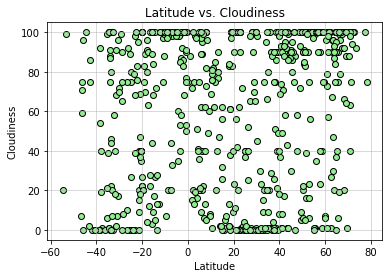

In [16]:
#Create x and y axis values: x is latitudes, y is cloudiness
latitudes = city_data["Lat"]
cloudiness = city_data["Cloudiness"]
plt.scatter(x=latitudes, y=cloudiness, edgecolor="black", color="lightgreen")
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(alpha=0.6)
plt.savefig("output_data/Figures/Lat_vs_Cloudiness.png")
plt.show()

# Lat vs Cloudiness Plot Analysis: 
This plot is analyzing if there is a trend in latitude and cloudiness to see if location of a city affects cloudiness

In [ ]:
# starting output given as an example (ignore this)

## Latitude vs. Wind Speed Plot

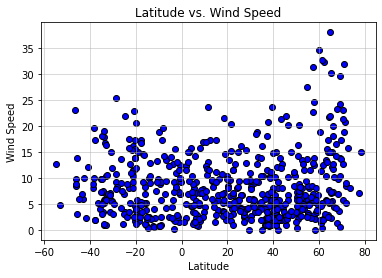

In [17]:
#Create x and y axis values: x is latitudes, y is wind speed
latitudes = city_data["Lat"]
wind = city_data["Wind Speed"]
plt.scatter(x=latitudes, y=wind, edgecolor="black", color="blue")
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(alpha=0.6)
plt.savefig("output_data/Figures/Lat_vs_WindSpeed.png")
plt.show()

# Lat vs wind speed Plot Analysis: 
This plot is analyzing if there is a trend in latitude and wind speed to see if location of a city affects wind speed

In [ ]:
# starting output given as an example (ignore this)

## Linear Regression

In [19]:
northern = city_data['Lat']>0
southern = city_data['Lat']<0
northern_hemi = city_data.loc[northern]
southern_hemi = city_data.loc[southern]

In [26]:
#create a function that does linear regression that you can use for multiple plots
def linreg_equ(x_values,y_values):
    #print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_equ = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values,"r-")
    return line_equ

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

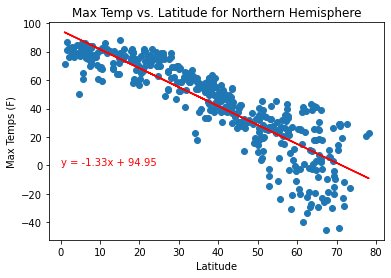

In [34]:
latitude_x = northern_hemi["Lat"]
temp_y = northern_hemi["Max Temp"]

#linear regression equation
lin_eq = linreg_equ(latitude_x, temp_y)

#show equation on graph
plt.annotate(lin_eq,(0,0),fontsize=10,color="red")

plt.title("Max Temp vs. Latitude for Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Max Temps (F)")

plt.savefig("output_data/Figures/NorthernLat_MaxTemp.png")


# The plot above shows that as latitude increases, the max temp decreases. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

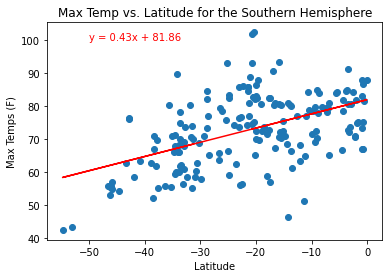

In [33]:
latitude_x = southern_hemi["Lat"]
temp_y = southern_hemi["Max Temp"]

#linear regression equation
lin_eq = linreg_equ(latitude_x, temp_y)

#show equation on graph
plt.annotate(lin_eq,(-50,100),fontsize=10,color="red")

plt.title("Max Temp vs. Latitude for the Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Max Temps (F)")

plt.savefig("output_data/Figures/SouthernLat_MaxTemp.png")


# The plot above shows that as latitude increases, the max temp increases. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

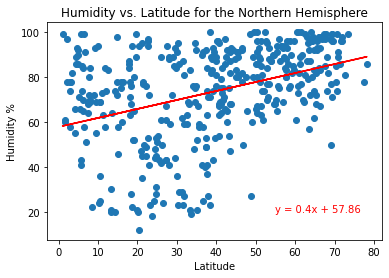

In [40]:
latitude_x = northern_hemi["Lat"]
humidity_y = northern_hemi["Humidity"]

#linear regression equation
lin_eq = linreg_equ(latitude_x, humidity_y)

#show equation on graph
plt.annotate(lin_eq,(55, 20),fontsize=10,color="red")

plt.title("Humidity vs. Latitude for the Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")

plt.savefig("output_data/Figures/NorthernHumidity.png")


# The plot above shows that as latitude increases, the humidity increases. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

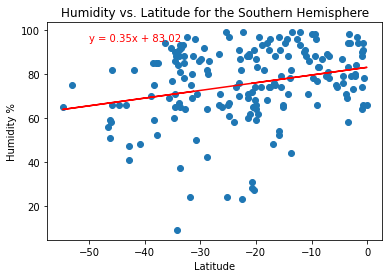

In [42]:
latitude_x = southern_hemi["Lat"]
humidity_y = southern_hemi["Humidity"]

#linear regression equation
lin_eq = linreg_equ(latitude_x, humidity_y)

#show equation on graph
plt.annotate(lin_eq,(-50,95),fontsize=10,color="red")

plt.title("Humidity vs. Latitude for the Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")

plt.savefig("output_data/Figures/SouthernHumidity.png")


# The plot above shows that as latitude increases, the humidity slightly increases. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

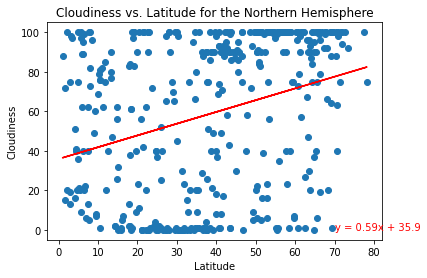

In [49]:
latitude_x = northern_hemi["Lat"]
cloud_y = northern_hemi["Cloudiness"]

#linear regression equation
lin_eq = linreg_equ(latitude_x, cloud_y)

#show equation on graph
plt.annotate(lin_eq,(70,0),fontsize=10,color="red")

plt.title("Cloudiness vs. Latitude for the Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.savefig("output_data/Figures/NorthernCloudiness.png")


# The plot above shows that as latitude increases, the cloudiness increases. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

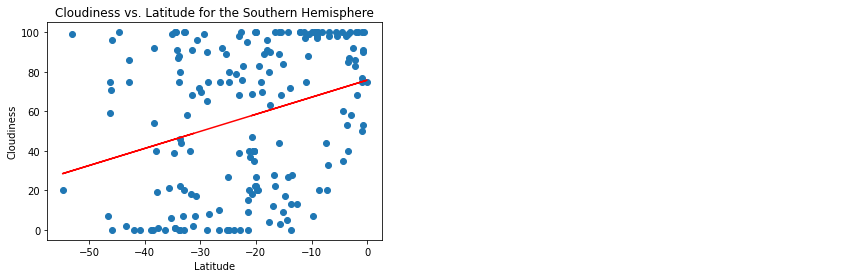

In [48]:
latitude_x = southern_hemi["Lat"]
cloud_y = southern_hemi["Cloudiness"]

#linear regression equation
lin_eq = linreg_equ(latitude_x, cloud_y)

#show equation on graph
plt.annotate(lin_eq,(70,0),fontsize=10,color="red")

plt.title("Cloudiness vs. Latitude for the Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.savefig("output_data/Figures/SOuthernCloudiness.png")


### The plot above shows that as latitude increases, the cloudiness increases. 


###  Northern Hemisphere - Wind Speed(mph) vs. Latitude Linear Regression

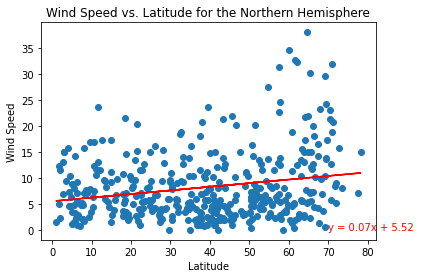

In [50]:
latitude_x = northern_hemi["Lat"]
wind_y = northern_hemi["Wind Speed"]

#linear regression equation
lin_eq = linreg_equ(latitude_x, wind_y)

#show equation on graph
plt.annotate(lin_eq,(70,0),fontsize=10,color="red")

plt.title("Wind Speed vs. Latitude for the Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.savefig("output_data/Figures/NorthernWindSpeed.png")


### The plot above shows that as latitude increases, the wind speed increases. 


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

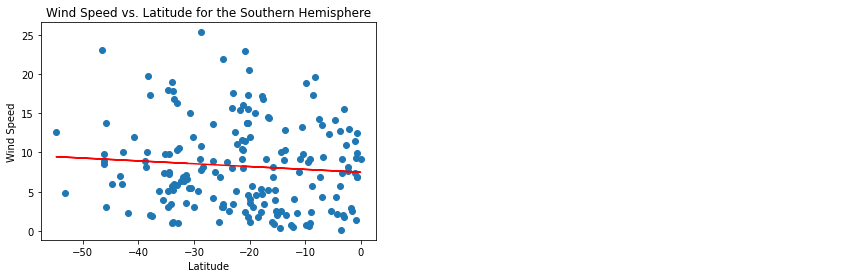

In [51]:
latitude_x = southern_hemi["Lat"]
wind_y = southern_hemi["Wind Speed"]

#linear regression equation
lin_eq = linreg_equ(latitude_x, wind_y)

#show equation on graph
plt.annotate(lin_eq,(70,0),fontsize=10,color="red")

plt.title("Wind Speed vs. Latitude for the Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.savefig("output_data/Figures/SouthernWindSpeed.png")


### The plot above shows that as latitude increases, the wind speed decreases. 
